## Q_1
Write a linear congruential random number generator in Python. Use it to obtain
10,000 uniformly distributed random numbers between 0 and 1. Make a density histogram of your numbers and compare it to the uniform PDF.

[0.84277344 0.29882812 0.72753906 ... 0.48242188 0.11425781 0.828125  ]


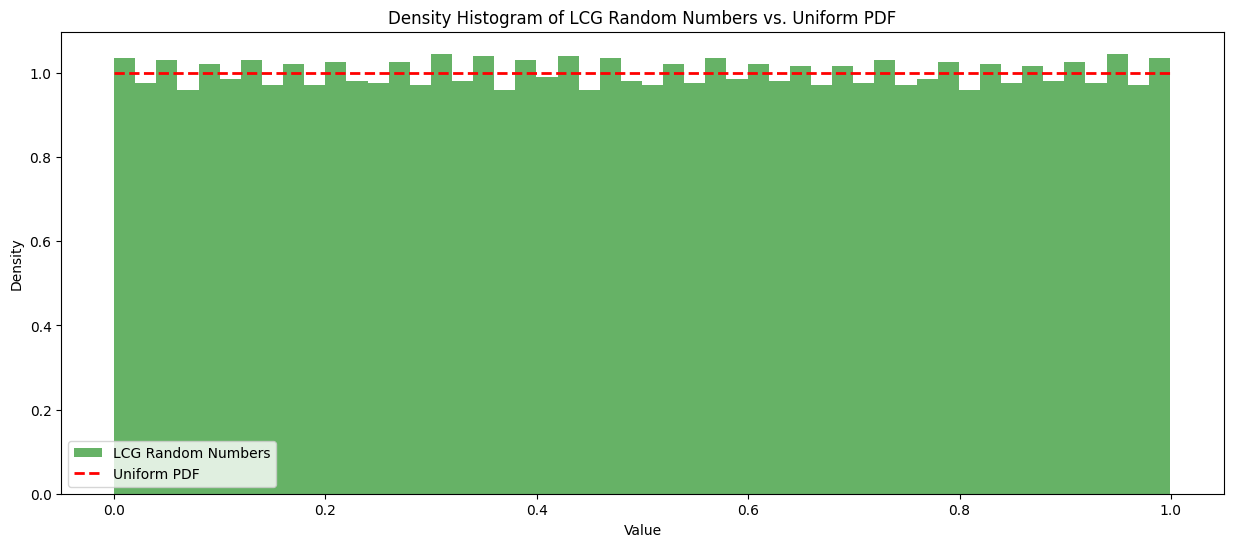

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the LCG
a = 1664525
c = 1013904223
m = 2**10

# Seed value
X0 = 0  # You can choose any arbitrary seed

# Number of random numbers to generate
n = 10000

# Initialize the list to hold the random numbers
random_numbers = []

# Generate the random numbers
X = X0
for _ in range(n):
    X = (a * X + c) % m
    random_numbers.append(X / m)

# Convert to a numpy array
random_numbers = np.array(random_numbers)

# Plotting the histogram of the random numbers
plt.figure(figsize=(15, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g', label='LCG Random Numbers')

# Plotting the uniform PDF for comparison
x = np.linspace(0, 1, 100)
uniform_pdf = np.ones_like(x)
plt.plot(x, uniform_pdf, 'r--', linewidth=2, label='Uniform PDF')
print(random_numbers)
plt.title('Density Histogram of LCG Random Numbers vs. Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q_2
Write a Python code to obtain 10,000 uniformly distributed random numbers between
0 and 1 using the library function np.random.rand(). Make a density histogram of
your numbers and compare it to the uniform PDF.

[0.84930423 0.29679934 0.7324726  ... 0.01969208 0.07801478 0.74051173]


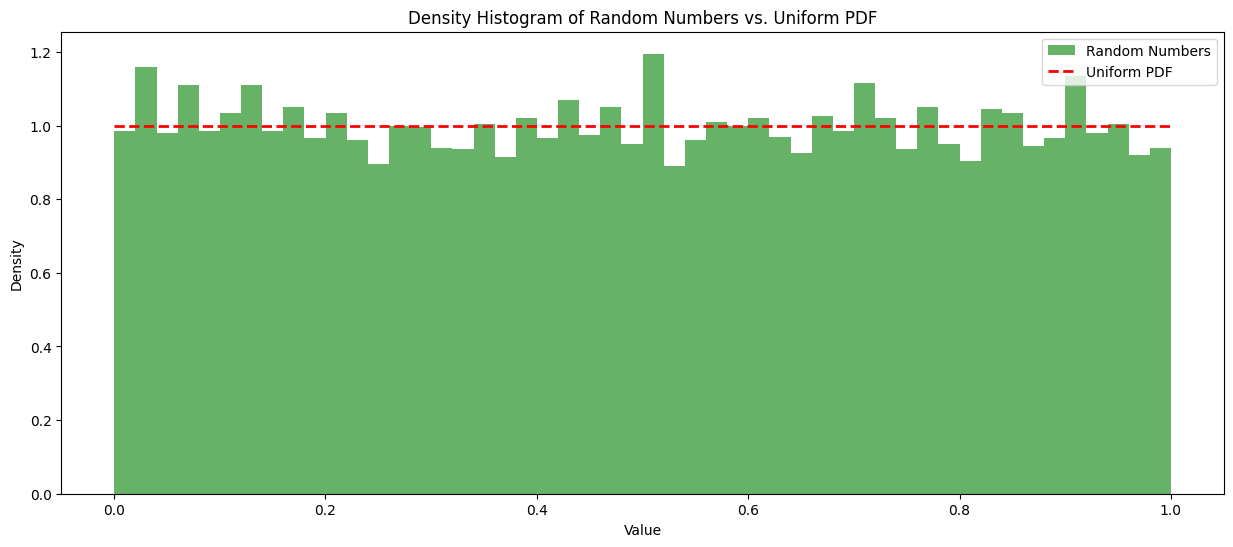

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 uniformly distributed random numbers between 0 and 1
random_numbers = np.random.rand(10000)

# Plotting the histogram of the random numbers
plt.figure(figsize=(15, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g', label='Random Numbers')

# Plotting the uniform PDF for comparison
x = np.linspace(0, 1, 100)
uniform_pdf = np.ones_like(x)
plt.plot(x, uniform_pdf, 'r--', linewidth=2, label='Uniform PDF')
print(random_numbers)
plt.title('Density Histogram of Random Numbers vs. Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q_3
 How long did each of your codes above take to produce 10,000 uniform deviates?

Time taken by LCG

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters for the LCG
a = 1664525
c = 1013904223
m = 2**10

# Seed value
X0 = 123456  # You can choose any arbitrary seed

# Number of random numbers to generate
n = 10000

# Initialize the list to hold the random numbers
random_numbers = []

# Start timing
start_time = time.time()

# Generate the random numbers
X = X0
for _ in range(n):
    X = (a * X + c) % m
    random_numbers.append(X / m)

# End timing
end_time = time.time()
lcg_time = end_time - start_time
print(f"Time taken by LCG to generate 10,000 random numbers: {lcg_time:.6f} seconds")



Time taken by LCG to generate 10,000 random numbers: 0.004997 seconds


Time taken by np.random.rand

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Start timing
start_time = time.perf_counter()

# Generate 10,000 uniformly distributed random numbers between 0 and 1
random_numbers = np.random.rand(10000)

# End timing
end_time = time.perf_counter()
numpy_time = end_time - start_time
print(f"Time taken by np.random.rand to generate 10,000 random numbers: {numpy_time:.6f} seconds")



Time taken by np.random.rand to generate 10,000 random numbers: 0.000664 seconds


## Q_5
Use the Box-Muller method in a Python code to produce 10,000 random numbers
distributed according to a Gaussian distribution with mean 0 and variance 1. Make a
density histogram of your numbers and compare it to the Gaussian PDF.
$$
\ z_0 = \sqrt{-2 \ln(u_1)} \cos(2 \pi u_2) \
$$
$$
\ z_1 = \sqrt{-2 \ln(u_1)} \sin(2 \pi u_2) \
$$

Time taken by Box-Muller method to generate 20,000 Gaussian random numbers: 0.001004 seconds


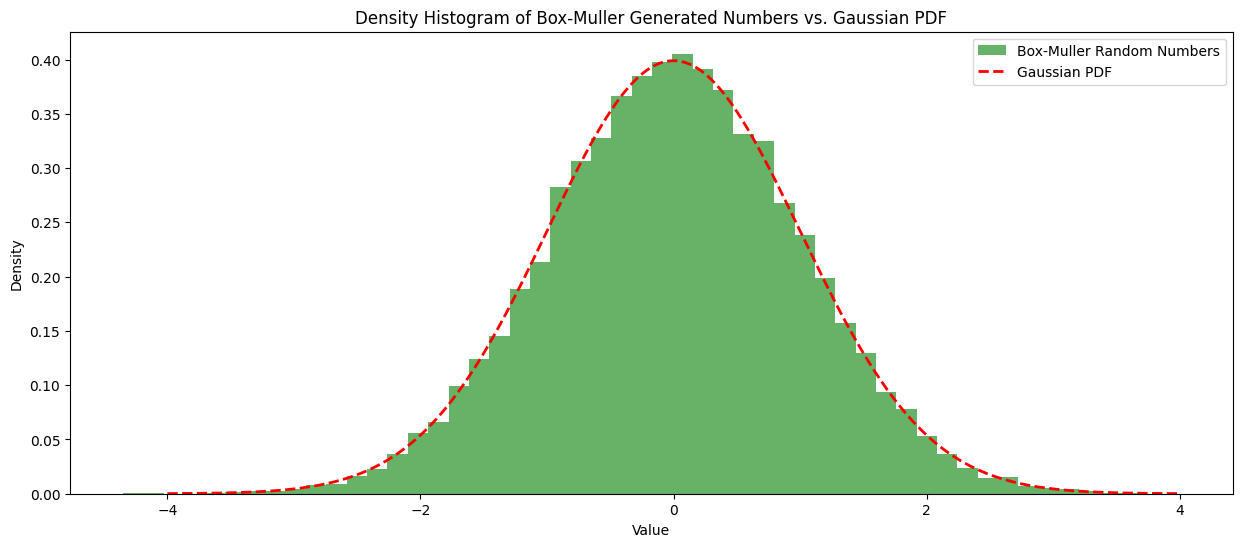

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Number of Gaussian-distributed random numbers to generate
n = 10000

# Generate uniformly distributed random numbers
u1 = np.random.rand(n)
u2 = np.random.rand(n)

# Start timing
start_time = time.time()

# Apply Box-Muller transform
z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2.0 * np.pi * u2)

# Combine the generated numbers
gaussian_numbers = np.concatenate((z0, z1))

# End timing
end_time = time.time()
box_muller_time = end_time - start_time
print(f"Time taken by Box-Muller method to generate 20,000 Gaussian random numbers: {box_muller_time:.6f} seconds")

# Plotting the histogram of the Gaussian-distributed random numbers
plt.figure(figsize=(15,6))
plt.hist(gaussian_numbers, bins=50, density=True, alpha=0.6, color='g', label='Box-Muller Random Numbers')

# Plotting the Gaussian PDF for comparison
x = np.linspace(-4, 4, 1000)
gaussian_pdf = (1/np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, gaussian_pdf, 'r--', linewidth=2, label='Gaussian PDF')

plt.title('Density Histogram of Box-Muller Generated Numbers vs. Gaussian PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q_6
## Generating Random Numbers Using the Rejection Method

Use the Rejection Method in a Python code to produce random numbers distributed according to the distribution:
$$
\ f(x) = \sqrt{\frac{2}{\pi}} e^{-x^2/2} \quad (x \geq 0) \
$$
Make a density histogram of your numbers and compare it to the distribution.


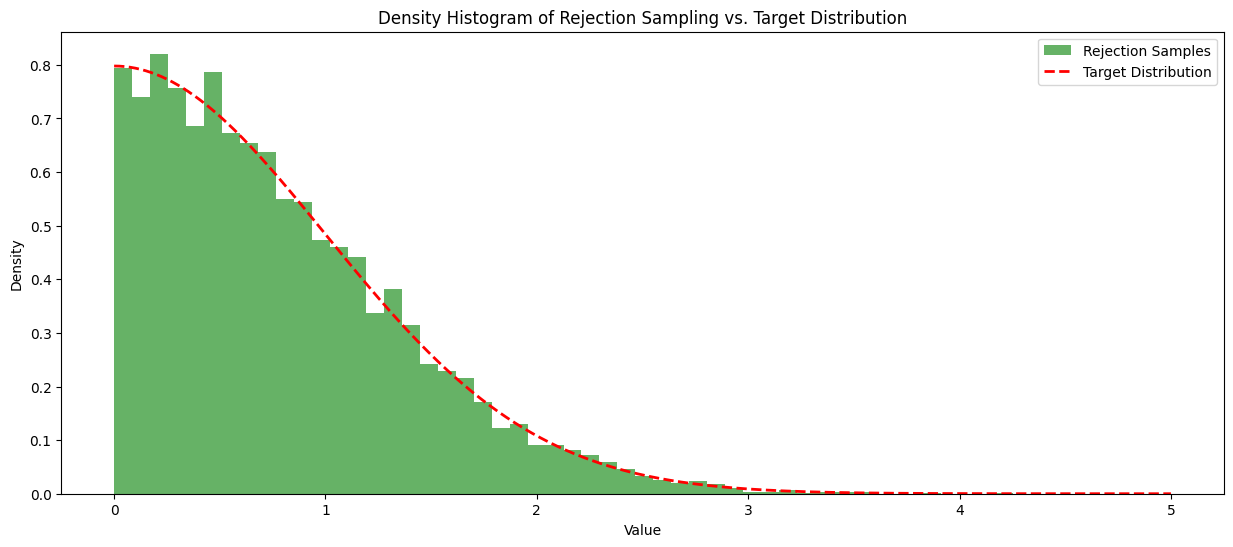

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: f(x) = (2 / sqrt( pi)) * exp(-x^2 / 2) for x >= 0
def target_distribution(x):
    return (np.sqrt(2/ np.pi)) * np.exp(-x**2 / 2)

# Rejection sampling to generate random numbers from the target distribution
def rejection_sampling(num_samples):
    samples = []
    while len(samples) < num_samples:
        # Generate candidate from uniform distribution U(0, b)
        x_candidate = np.random.uniform(0, 5)
        # Generate a uniform random number for acceptance criterion
        y = np.random.uniform(0, target_distribution(0))
        # Accept or reject the candidate
        if y <= target_distribution(x_candidate):
            samples.append(x_candidate)
    return np.array(samples)

# Number of samples to generate
num_samples = 10000

# Generate samples using rejection sampling
samples = rejection_sampling(num_samples)

# Plotting the histogram of the generated samples
plt.figure(figsize=(15, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Rejection Samples')

# Plotting the target distribution for comparison
x = np.linspace(0, 5, 1000)
pdf = target_distribution(x)
plt.plot(x, pdf, 'r--', linewidth=2, label='Target Distribution')

plt.title('Density Histogram of Rejection Sampling vs. Target Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q_7
Chi-square Test for Randomness of Dice Rolls

In [1]:
import numpy as np
from scipy.stats import chi2

# Observed counts from the two runs
observed_counts_1 = [ 4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13]
observed_counts_2 = [ 3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5]
expected_probabilities = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1], dtype=float)

# Normalize the expected probabilities
expected_probabilities /= sum(expected_probabilities)
#print(expected_probabilities)
# Calculate the expected counts for each outcome
expected_counts_1 = sum(observed_counts_1) * expected_probabilities
expected_counts_2 = sum(observed_counts_2) * expected_probabilities
#print(expected_counts_1)
#print(expected_counts_2)
# Compute the chi-square statistic for the first run
chi_squared_1 = sum((observed - expected)**2 / expected for observed, expected in zip(observed_counts_1, expected_counts_1))

# Compute the chi-square statistic for the second run
chi_squared_2 = sum((observed - expected)**2 / expected for observed, expected in zip(observed_counts_2, expected_counts_2))

# Compare the chi-square statistics to the critical value
critical_value = chi2.ppf(0.95, df=10)

# Determine the randomness of each run based on the chi-square statistic
def label_randomness(chi_squared):
    if chi_squared > critical_value:
        return "Not sufficiently random"
    elif chi_squared > 0.1 * critical_value:
        return "Suspect"
    elif chi_squared > 0.05 * critical_value:
        return "Almost suspect"
    else:
        return "Sufficiently random"

# Print the labels for each run
print("Run 1:", label_randomness(chi_squared_1))
print("Run 2:", label_randomness(chi_squared_2))


Run 1: Not sufficiently random
Run 2: Almost suspect


## Q_8
## Monte Carlo Integration for Circle Area and Sphere Volume

The area of a circle with unit radius is given by:
$$
\ I = \int_{-1}^{1} \int_{-1}^{1} f(x, y) \, dx \, dy, \
$$
where
$$
\ f(x) = \begin{cases} 
1 & \text{if } x^2 + y^2 \leq 1 \\
0 & \text{otherwise}
\end{cases} \
$$
1. Calculate the area of the unit circle using Monte Carlo integration.

In [33]:
import numpy as np

def monte_carlo_circle_area(num_samples):
    num_inside_circle = 0
    for _ in range(num_samples):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            num_inside_circle += 1
    circle_area = 4 * num_inside_circle / num_samples
    return circle_area


# Calculate the area of the unit circle using Monte Carlo integration
num_samples_circle = 1000000
circle_area = monte_carlo_circle_area(num_samples_circle)
print("Estimated area of the unit circle:", circle_area)

Estimated area of the unit circle: 3.141948



2. Calculate the volume of a ten-dimensional unit sphere using Monte Carlo integration.

In [37]:
import numpy as np

def monte_carlo_sphere_volume(num_samples, num_dimensions):
    num_inside_sphere = 0
    for _ in range(num_samples):
        point = np.random.uniform(-1, 1, size=num_dimensions)
        if np.linalg.norm(point) <= 1:
            num_inside_sphere += 1
    sphere_volume = (2**num_dimensions) * num_inside_sphere / num_samples
    return sphere_volume

# Calculate the volume of the ten-dimensional unit sphere using Monte Carlo integration
num_dimensions = 10
num_samples_sphere = 1000000
sphere_volume = monte_carlo_sphere_volume(num_samples_sphere, num_dimensions)
print("Estimated volume of the ten-dimensional unit sphere:", sphere_volume)


Estimated volume of the ten-dimensional unit sphere: 2.481152


## Q_9
Use the Metropolis algorithm to get a sample from a density that is uniform for 3 <
x < 7 and zero elsewhere. Write your own code for the Metropolis method; don’t use a
library function. Make a plot showing your Markov Chain. Make a density histogram
of your numbers and compare it to the distribution.

a. plot of Markov Chain

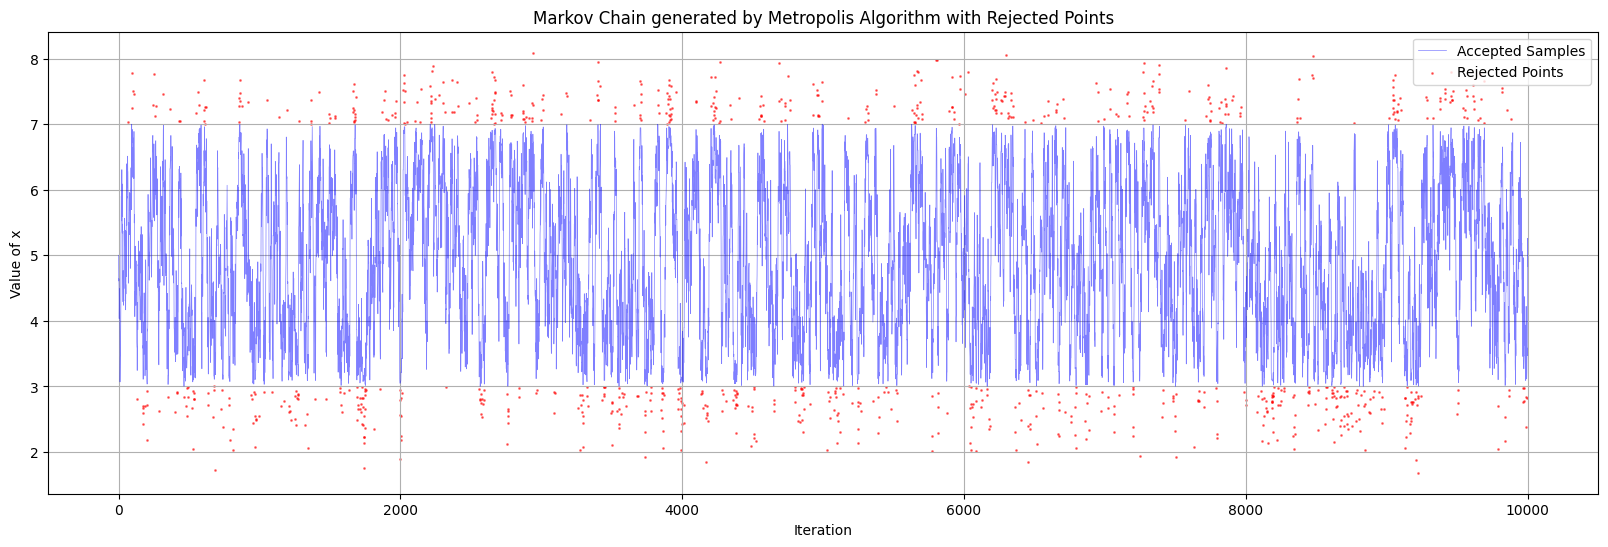

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Metropolis algorithm function
def metropolis_uniform(initial_x, num_samples, step_size):
    samples = [initial_x]
    rejected_points = []
    current_x = initial_x
    
    for i in range(num_samples):
        # Propose a new candidate within the neighborhood of the current point
        candidate_x = current_x + np.random.normal(scale=step_size)
        
        # Acceptance probability based on the ratio of target density at candidate_x to current_x
        acceptance_prob = (3 < candidate_x < 7) / (3 < current_x < 7)
        
        # Accept or reject the candidate
        if np.random.rand() < acceptance_prob:
            current_x = candidate_x
        else:
            rejected_points.append((i, candidate_x))
        
        # Add the accepted sample to the list
        samples.append(current_x)
    
    return np.array(samples), np.array(rejected_points)

# Parameters
initial_x = 5  # Initial point within the range [3, 7]
num_samples = 10000  # Number of samples
step_size = 0.5  # Step size for proposing new samples

# Generate samples using the Metropolis algorithm
samples, rejected_points = metropolis_uniform(initial_x, num_samples, step_size)

# Plot the Markov chain with rejected points
plt.figure(figsize=(20, 6))
plt.plot(samples, color='blue', alpha=0.5, linewidth=0.5, label='Accepted Samples')
if len(rejected_points) > 0:
    plt.scatter(rejected_points[:,0], rejected_points[:,1], color='red', alpha=0.5, s=1, label='Rejected Points')
plt.title('Markov Chain generated by Metropolis Algorithm with Rejected Points')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.legend()
plt.grid(True)
plt.show()

b.
Density histogram
of random  numbers and compare it to the  uniform distribution

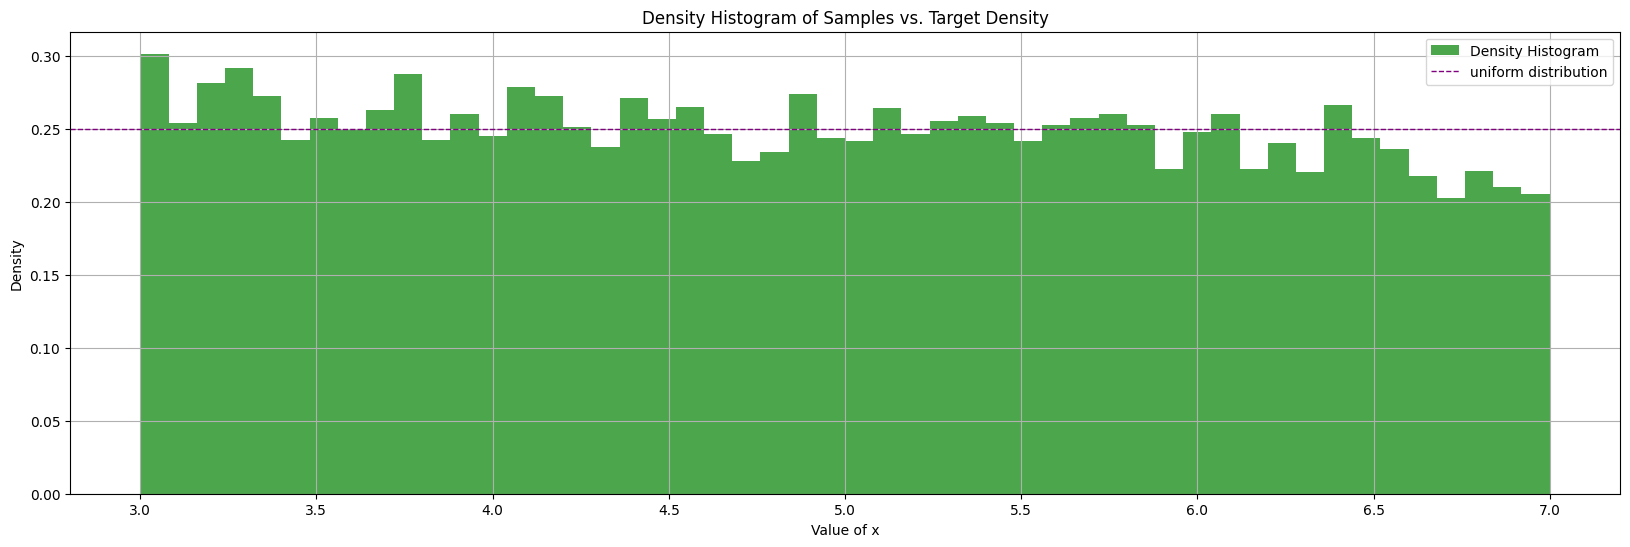

In [7]:
# Plot density histogram of the samples
plt.figure(figsize=(20, 6))
plt.hist(samples, bins=50, density=True, color='green', alpha=0.7, label='Density Histogram')
plt.axhline(y=0.25, color='purple', linestyle='--', linewidth=1, label='uniform distribution')  
plt.title('Density Histogram of Samples vs. Target Density')
plt.xlabel('Value of x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Q_10
Consider the data that we discussed in our 19 May lecture. These data are listed in
the file https://theory.tifr.res.in/~kulkarni/data.txt. Use the emcee library
to fit the model
$$
\
y = ax^2 + bx + c
\
$$
to these data by performing Bayesian probabilistic inference using MCMC

# a. optimiztion of fit parameter a,b and c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Load data from the provided file
data = np.loadtxt('data.txt')
x_data, y_data, y_error = data[:, 1], data[:, 2], data[:, 3]

# Define the quadratic model
def model(x, a, b, c):
    return a * x**2 + b * x + c

# Define the log-likelihood function
def log_likelihood(params, x, y, yerr):
    a, b, c = params
    model_y = model(x, a, b, c)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(2 * np.pi * sigma2))

# Define the log-prior function
def log_prior(params):
    a, b, c = params
    if -10.0 < a < 10.0 and -10.0 < b < 10.0 and -10.0 < c < 10.0:
        return 0.0
    return -np.inf

# Define the log-probability function
def log_probability(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)

# Set up the MCMC sampler
num_walkers = 50
num_steps = 4000
initial_guess = [1.0, 1.0, 1.0]  # Initial guess for [a, b, c]
ndim = len(initial_guess)
pos = initial_guess + 1e-4 * np.random.randn(num_walkers, ndim)

sampler = emcee.EnsembleSampler(num_walkers, ndim, log_probability, args=(x_data, y_data, y_error))
sampler.run_mcmc(pos, num_steps, progress=True)

# Flatten the chains and discard the burn-in
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Calculate the best-fit parameters and their uncertainties
best_fit_params = np.median(flat_samples, axis=0)
uncertainties = np.std(flat_samples, axis=0)
a_median, b_median, c_median = best_fit_params
a_sigma, b_sigma, c_sigma = uncertainties

print(f"Best-fit parameters: a = {a_median:.3f} ± {a_sigma:.3f}, b = {b_median:.3f} ± {b_sigma:.3f}, c = {c_median:.3f} ± {c_sigma:.3f}")


100%|██████████| 4000/4000 [00:04<00:00, 894.30it/s]

Best-fit parameters: a = -0.008 ± 0.001, b = 3.914 ± 0.126, c = 0.756 ± 5.789


# b. Plot of Markov chains

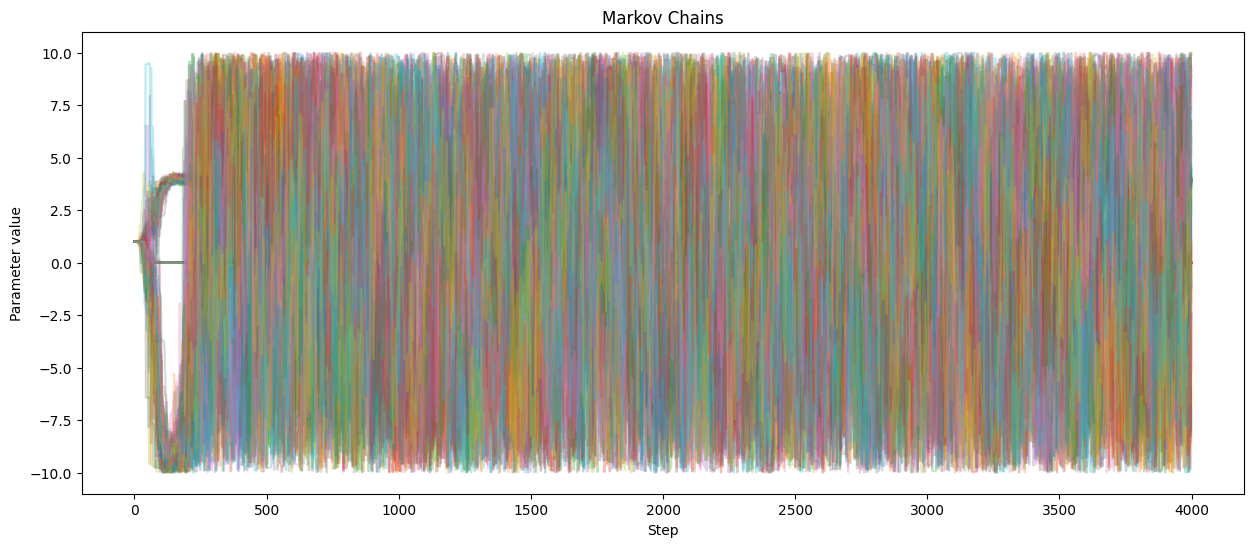

In [2]:

# Plot the Markov chains
plt.figure(figsize=(15, 6))
for i in range(ndim):
    plt.plot(sampler.chain[:, :, i].T, alpha=0.3)
plt.xlabel("Step")
plt.ylabel("Parameter value")
plt.title("Markov Chains")
plt.show()


## c. corner plot

Text(0.5, 0.98, 'Corner Plot of Posterior Distributions')

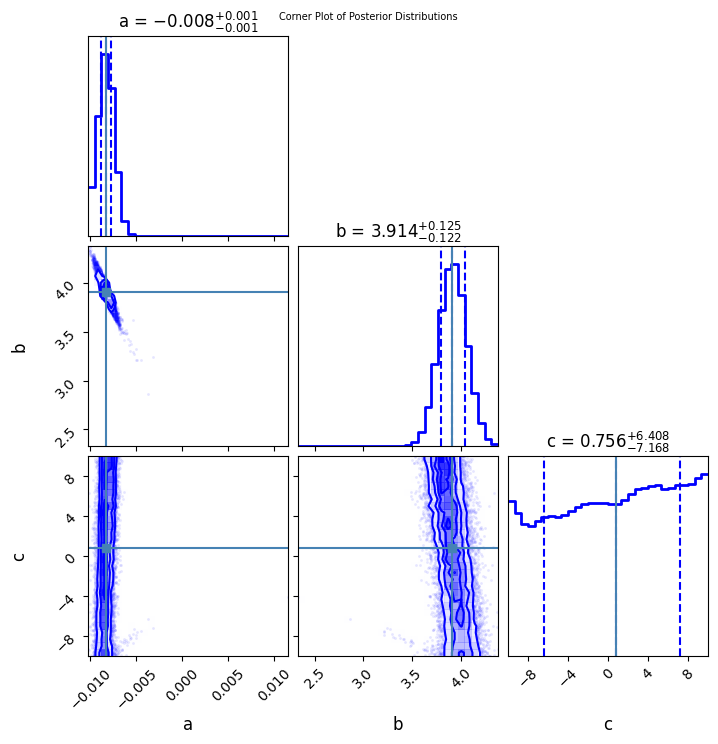

In [6]:
# Plot the corner plot with customized settings
figure = corner.corner(
    flat_samples,
    labels=["a", "b", "c"],
    truths=[a_median, b_median, c_median],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12},
    hist_kwargs={"linewidth": 2},  # Removed density=True
    smooth1d=True,
    bins=30,
    color="blue",
)
figure.suptitle("Corner Plot of Posterior Distributions", fontsize=7)

# d.  plot of best-fit model and 200 models randomly chosen from the posterior.

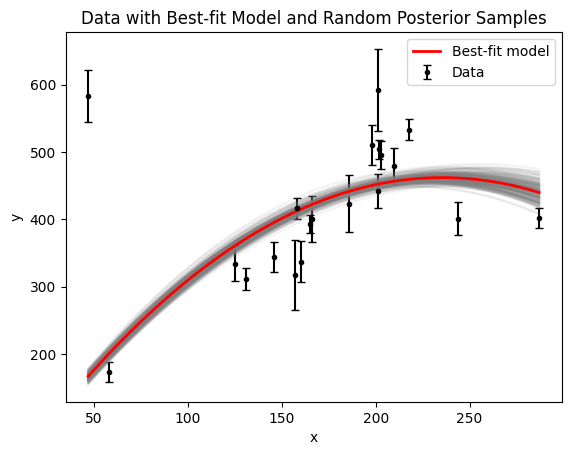

In [5]:
# Plot the data with the best-fit model and 200 random samples from the posterior
plt.errorbar(x_data, y_data, yerr=y_error, fmt=".k", capsize=3, label="Data")
x_fit = np.linspace(min(x_data), max(x_data), 1000)
for a, b, c in flat_samples[np.random.randint(len(flat_samples), size=200)]:
    plt.plot(x_fit, model(x_fit, a, b, c), color="gray", alpha=0.1)
plt.plot(x_fit, model(x_fit, a_median, b_median, c_median), color="red", lw=2, label="Best-fit model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Data with Best-fit Model and Random Posterior Samples")
plt.show()
